In [3]:
import json
import pandas as pd
import numpy as np

In [4]:
results_data = dict()
with open("results.json","r") as results_file:
    results_data = json.load(results_file)
len(results_data)

3

## Results Analysis

### Coherence

I used the U-Mass calculation for coherence, which values range from -14 to 14. Chose this metric because the calculation is much faster than the more accurate CV measure, which allowed for faster experimentation. The resulting coherence was as follows:

In [5]:
results_data["coherence"]

-0.7343926389634118

For this implementation, the closer to 0, the better the coherence. In this case, we got a decent score.

## Probabilities

In [6]:
probability_array = np.array(results_data["probabilities"])
probability_array

array([[0.00000000e+000, 0.00000000e+000, 1.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 3.38815404e-123],
       [0.00000000e+000, 0.00000000e+000, 1.94026617e-185, ...,
        0.00000000e+000, 0.00000000e+000, 1.07051037e-087],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 1.16815757e-297],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 3.90851773e-238]])

<AxesSubplot:>

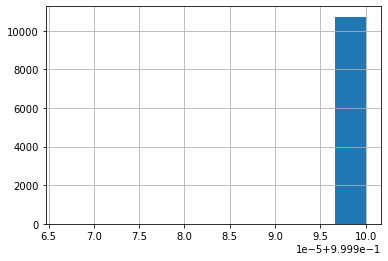

In [11]:
pd.Series(probability_array.max(axis=1)).hist()

The probability distribution is mostly skewed to values very close to 1 or very close to 0, as these topic probabilities per example must sum to 1. Therefore, we can observe that all the time, the model is predicting only one topic per text.

## Top Tokens

Let's see some of the most common tokens in some topics and pinpoint an accurate description for them.

In [14]:
top_tokens = results_data["top_tokens"]
top_tokens[:5]

[['ms', 'city', 'years', 'year', 'water'],
 ['court', 'justice', 'law', 'state', 'case'],
 ['trump', 'house', 'trumps', 'campaign', 'republican'],
 ['trump', 'house', 'states', 'republican', 'trumps'],
 ['state', 'islamic', 'syria', 'government', 'united']]

Topic 1 seems to be about water in a city over the years.  Topic 2 seems to be about law and court cases. Three and Four seem related to the Trump presidential campaign. And Topic 5 seems to be about Syria or islamic states. 

## Further Improvements

- Use the CV score instead of UMass for more accurate coherence scores.

- Plot the coherence vs # topics to find the optimal number of topics

- Stemming to cut words that appear twice (plural vs singular)

- Experiment with  different sentence embedding models

- Experiment with different text preprocessing settings